# <font color=blue>Assignments for "Making Predictions"</font>

In this exercise, you'll predict house prices using your model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

- Load the **houseprices** data from Kaggle
- Split your data into train and test sets.
- Estimate your model from the previous lesson in the train set. Assess the goodness of fit of your model.
- Predict the house prices in the test set and evaluate the performance of your model using the metrics we mentioned in this lesson.
- Is the performance of your model satisfactory? Why?
- Try to improve your model in terms of prediction performance by adding or removing some variables.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

In [4]:
hp = pd.read_csv("C:/Users/Elif/data/house_prices.csv")

In [5]:
hp = hp.drop(['PoolQC','MiscFeature','Fence','Alley'], axis=1)


In [6]:
from pandas.api.types import is_numeric_dtype
def fix_missing(hp, col, name):
    if is_numeric_dtype(col):
        hp[name] = col.fillna(col.median())
    

In [7]:
for n, c in hp.items():
        fix_missing(hp, c, n)

In [8]:
hp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [9]:
# Y is the target variable
Y = hp['SalePrice']
# X is the feature set which includes

X = hp[['GrLivArea','OverallQual']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [10]:
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1461.
Date:                Sat, 19 Sep 2020   Prob (F-statistic):          2.98e-318
Time:                        22:58:59   Log-Likelihood:                -14080.
No. Observations:                1168   AIC:                         2.817e+04
Df Residuals:                    1165   BIC:                         2.818e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.019e+05   5577.051    -18.271      0.000   -1.13e+05    -9.1e+04
GrLivArea      53.9026      2.860     18.844      0.000      48.290      59.515
OverallQual  3.282e+04   1106.409     29.664      0.000    3.06e+04     3.5e+04
==============================================================================
Omnibus:                      243.780   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7370.355
Skew:                           0.120   Prob(JB):                         0.00
Kurtosis:                      15.304   Cond. No.                     7.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The success of the model was calculated as the R-squared value of 0.71. The features I train the model are meaningful.

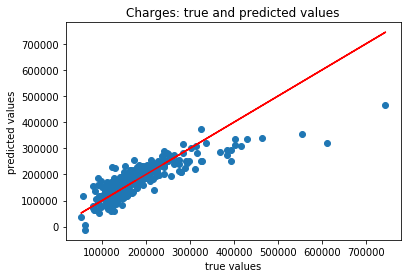

Mean absolute error of the prediction is: 30832.886049410597
Mean squared error of the prediction is: 2103565380.2387295
Root mean squared error of the prediction is: 45864.64193950204
Mean absolute percentage error of the prediction is: 18.193225691648355


In [11]:
# We add constant to the model as it's a best practice
# to do so everytime!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [14]:
from sklearn import linear_model
import statsmodels.api as sm
# Y is the target variable
Y = hp['SalePrice']
# X is the feature set which includes
hp['Grov'] = hp['GrLivArea']* hp['OverallQual']
X = hp[['GrLivArea','OverallQual','Grov']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     1337.
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:08:11   Log-Likelihood:                -17578.
No. Observations:                1460   AIC:                         3.516e+04
Df Residuals:                    1456   BIC:                         3.519e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.003e+04   1.21e+04      0.829      0.407   -1.37e+04    3.38e+04
GrLivArea     -23.4281      8.103     -2.891      0.004     -39.323      -7.534
OverallQual  1.541e+04   1948.165      7.910      0.000    1.16e+04    1.92e+04
Grov           11.6196      1.128     10.305      0.000       9.408      13.831
==============================================================================
Omnibus:                      702.946   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50438.620
Skew:                          -1.377   Prob(JB):                         0.00
Kurtosis:                      31.662   Cond. No.                     1.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""